The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

The Augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative
number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

#**JPM Dataset**

In [ ]:
series = pd.read_csv('JPM.csv', header=0, index_col=0)
series.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,5.129630,5.018519,5.037037,1.122904,62775
1980-03-18,0.0,5.111111,5.037037,5.074074,1.131161,64125
1980-03-19,0.0,5.166667,5.111111,5.148148,1.147674,40500
1980-03-20,0.0,5.148148,5.092593,5.111111,1.139418,18900
1980-03-21,0.0,5.222222,5.111111,5.222222,1.164188,97200


In [ ]:
series.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

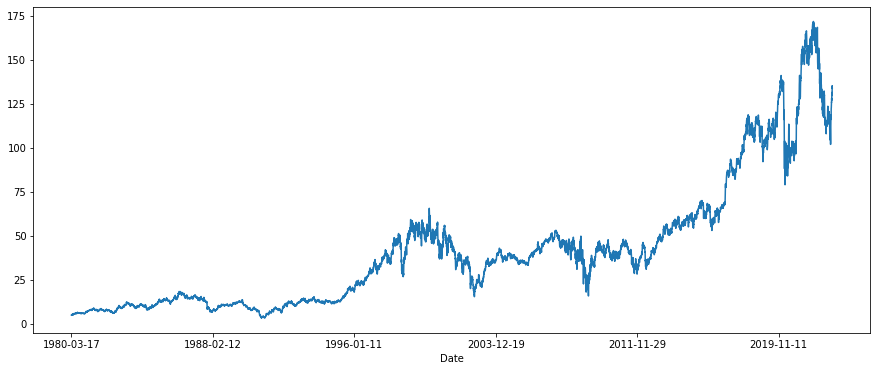

In [ ]:
series['Close'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Augmented Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data.
    #T is simply the calculated difference represented in units of standard error.
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No. of Lags used','No. of Observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1%, 5%, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
    print (dfoutput)
    if dftest[1] < 0.05:     # p-value =< 0.05
        print("Conclusion:====>")
        print("Null Hypothesis has been rejected.")
        print("The Data is Stationary.")
    else:
        print("Conclusion:====>")
        print("Failed to reject the Null Hypothesis.")
        print("Data is non-stationary.")

**ADF test is conducted with the following assumptions:**

**Null Hypothesis (Ho):** Series is non-stationary or series has a unit root.

**Alternate Hypothesis(Ha):** Series is stationary or series has no unit root.

If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

**Conditions to Reject Null Hypothesis(Ho):**

If Test-statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary, else otherwise.

In [ ]:
print("Null Hypothesis (Ho): Series is non-stationary or series has a unit root.")
print("Alternate Hypothesis(Ha): Series is stationary or series has no unit root.")

Null Hypothesis (Ho): Series is non-stationary or series has a unit root.
Alternate Hypothesis(Ha): Series is stationary or series has no unit root.


In [ ]:
Augmented_Dickey_Fuller_Test_func(series['Close'], 'Close')

Results of Augmented Dickey-Fuller Test for column: Close
Test Statistic                 -0.324347
p-value                         0.921985
No. of Lags used               39.000000
No. of Observations used    10719.000000
Critical Value (1%)            -3.430960
Critical Value (5%)            -2.861810
Critical Value (10%)           -2.566914
dtype: float64
Conclusion:====>
Failed to reject the Null Hypothesis.
Data is non-stationary.


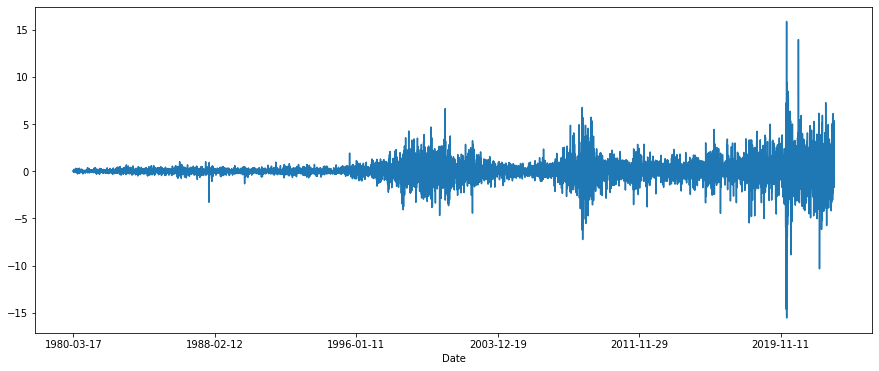

In [ ]:
series['Close'].diff().plot(figsize=(15,6))

In [ ]:
print("Null Hypothesis (Ho): Series is non-stationary or series has a unit root.")
print("Alternate Hypothesis(Ha): Series is stationary or series has no unit root.")

Null Hypothesis (Ho): Series is non-stationary or series has a unit root.
Alternate Hypothesis(Ha): Series is stationary or series has no unit root.


In [ ]:
Augmented_Dickey_Fuller_Test_func(series['Close'].diff().dropna(),'1')

Results of Augmented Dickey-Fuller Test for column: 1
Test Statistic             -1.551765e+01
p-value                     2.305185e-28
No. of Lags used            3.900000e+01
No. of Observations used    1.071800e+04
Critical Value (1%)        -3.430960e+00
Critical Value (5%)        -2.861810e+00
Critical Value (10%)       -2.566914e+00
dtype: float64
Conclusion:====>
Null Hypothesis has been rejected.
The Data is Stationary.


#**Petrol Dataset (Own)**

In [ ]:
owndt = pd.read_csv('/content/petrol.csv', header=0, index_col=0)
owndt.head()

,date,rate,state
city,,,
Hyderabad,2011-12-01,73.07,Telangana
Hyderabad,2012-04-01,73.08,Telangana
Hyderabad,2012-05-24,81.44,Telangana
Hyderabad,2012-06-03,78.11,Telangana
Hyderabad,2012-06-29,74.89,Telangana


In [ ]:
owndt.columns

Index(['date', 'rate', 'state'], dtype='object')

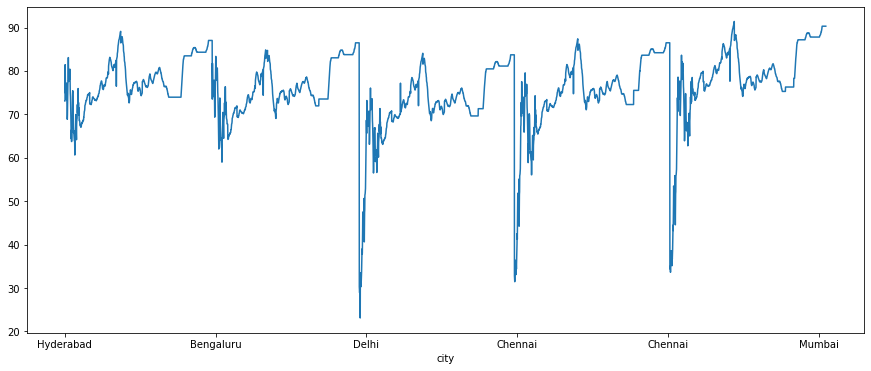

In [ ]:
owndt['rate'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
print("Null Hypothesis (Ho): Series is non-stationary or series has a unit root.")
print("Alternate Hypothesis(Ha): Series is stationary or series has no unit root.")

Null Hypothesis (Ho): Series is non-stationary or series has a unit root.
Alternate Hypothesis(Ha): Series is stationary or series has no unit root.


In [ ]:
Augmented_Dickey_Fuller_Test_func(owndt['rate'], 'rate')

Results of Augmented Dickey-Fuller Test for column: rate
Test Statistic             -7.411741e+00
p-value                     7.104479e-11
No. of Lags used            1.300000e+01
No. of Observations used    5.034000e+03
Critical Value (1%)        -3.431650e+00
Critical Value (5%)        -2.862114e+00
Critical Value (10%)       -2.567076e+00
dtype: float64
Conclusion:====>
Null Hypothesis has been rejected.
The Data is Stationary.


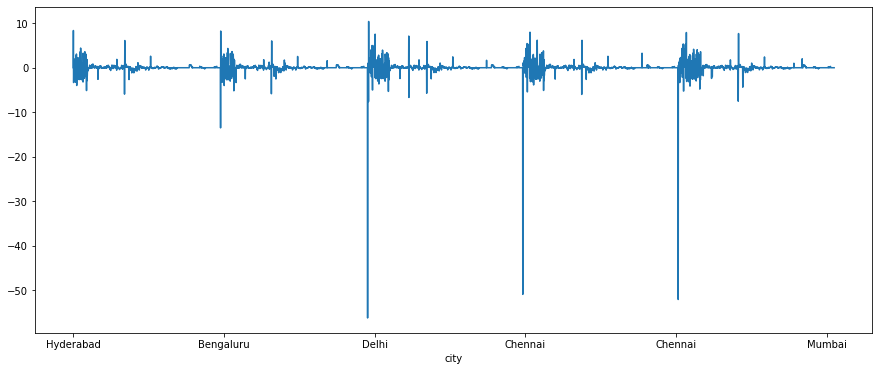

In [ ]:
owndt['rate'].diff().plot(figsize=(15,6))

In [ ]:
print("Null Hypothesis (Ho): Series is non-stationary or series has a unit root.")
print("Alternate Hypothesis(Ha): Series is stationary or series has no unit root.")

Null Hypothesis (Ho): Series is non-stationary or series has a unit root.
Alternate Hypothesis(Ha): Series is stationary or series has no unit root.


In [ ]:
Augmented_Dickey_Fuller_Test_func(owndt['rate'].diff().dropna(),'1')

Results of Augmented Dickey-Fuller Test for column: 1
Test Statistic               -25.036311
p-value                        0.000000
No. of Lags used               7.000000
No. of Observations used    5039.000000
Critical Value (1%)           -3.431648
Critical Value (5%)           -2.862114
Critical Value (10%)          -2.567075
dtype: float64
Conclusion:====>
Null Hypothesis has been rejected.
The Data is Stationary.
